<a href="https://colab.research.google.com/github/aymuos/starship/blob/main/fundamental_EDA/actuallyWorking/testing_join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
- compare the mini testing pipeline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base = "/content/drive/MyDrive/ml/PROCESSED"

In [2]:
import polars as pl

# Define paths for original and processed parquet files
ORIGINAL_GPS_PARQUET = '/content/drive/MyDrive/ml/trajectory.parquet'
PROCESSED_GPS_PARQUET = '/content/drive/MyDrive/ml/trajectory_processed.parquet'

# Load the original parquet file
gps_df = pl.read_parquet(ORIGINAL_GPS_PARQUET)

# Apply the transformation to gps_time: prepend '2021-' and convert to datetime
gps_df_processed = gps_df.with_columns(
    (pl.lit("2021-") + pl.col("gps_time")).str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S", strict=False).alias("gps_time")
)

# Save the processed DataFrame to a new parquet file
gps_df_processed.write_parquet(PROCESSED_GPS_PARQUET)

# Update the GPS_PARQUET variable to point to the new processed file
GPS_PARQUET = PROCESSED_GPS_PARQUET

print(f"Original GPS Parquet file: {ORIGINAL_GPS_PARQUET}")
print(f"Processed GPS Parquet file saved to: {GPS_PARQUET}")
print("Head of the processed GPS data:")
# Read the processed file and show the top 10 rows to verify
pl.read_parquet(GPS_PARQUET).head(10)

Original GPS Parquet file: /content/drive/MyDrive/ml/trajectory.parquet
Processed GPS Parquet file saved to: /content/drive/MyDrive/ml/trajectory_processed.parquet
Head of the processed GPS data:


ds,postman_id,gps_time,lat,lng
i64,str,datetime[μs],f64,f64
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 07:31:58,3.9537e6,3.0534e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 07:32:18,3.9537e6,3.0534e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 07:32:41,3.9537e6,3.0534e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 07:55:51,3.9537e6,3.0534e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 08:31:42,3.9539e6,3.0524e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 08:32:32,3.9540e6,3.0530e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 08:32:52,3.9539e6,3.0526e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 08:41:34,3.9539e6,3.0524e6
321,"""106f5ac22cfd1574b196d16fed62f9…",2021-03-21 09:17:25,3.9506e6,3.0525e6


/tmp/ipython-input-105112772.py:12: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total_gps_records")


Top 519 postmen (top 25% by GPS record count):
shape: (519, 2)
┌─────────────────────────────────┬───────────────────┐
│ postman_id                      ┆ total_gps_records │
│ ---                             ┆ ---               │
│ str                             ┆ u32               │
╞═════════════════════════════════╪═══════════════════╡
│ 7bf4460bf69d9cb189bbfd36122103… ┆ 130954            │
│ af02004cc76b0ed5f4b535ae1c664a… ┆ 126190            │
│ abb1e9481995b8acea2fdabf1ac6b2… ┆ 123882            │
│ 873af2447745c7fa978f7f43d9a63c… ┆ 120823            │
│ 2ff040e0b7c40fa4490965b7bea681… ┆ 120561            │
│ …                               ┆ …                 │
│ 3bcba75891598612256fbd591c5717… ┆ 42206             │
│ 730f4196615e29adc7f5166e737c45… ┆ 42136             │
│ 9b14f0a378361393cecf51baa1f627… ┆ 42120             │
│ d0f330c68386d516abcbc42f801e01… ┆ 42116             │
│ a3a75fade321378379aafdc54cd6d2… ┆ 42065             │
└─────────────────────────────────┴──────

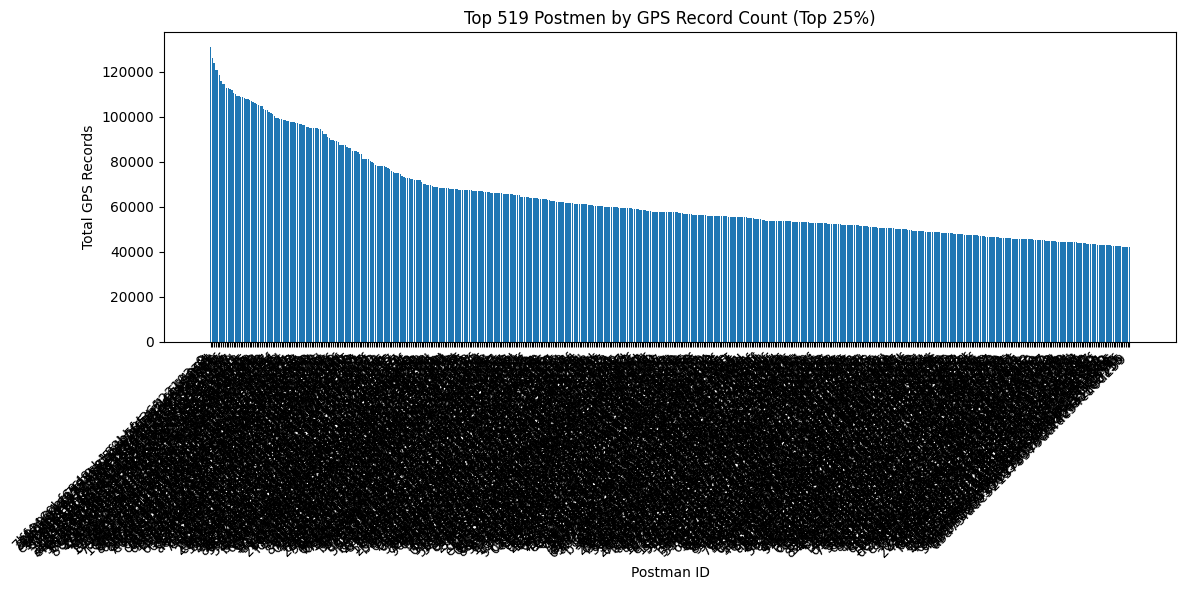

In [3]:
import matplotlib.pyplot as plt
import polars as pl

# Assuming GPS_PARQUET is already defined and points to the processed trajectory file
# If not, you might need to run the cell where GPS_PARQUET is set or define it here.

# Load the processed GPS data
gps_data = pl.read_parquet(GPS_PARQUET)

# 1. Calculate GPS record counts per postman_id
postman_gps_counts = gps_data.group_by("postman_id").agg(
    pl.count().alias("total_gps_records")
).sort("total_gps_records", descending=True)

# 2. Determine the top percentile (e.g., top 25% of unique couriers), middle 25, and bottom 25
num_unique_postmen = postman_gps_counts.height

# Top 25% of postmen
top_percentile_count = max(1, int(num_unique_postmen * 0.25)) # Ensure at least 1 postman
top_postmen = postman_gps_counts.head(top_percentile_count)

# Middle 25 postmen
middle_start_index = max(0, (num_unique_postmen // 2) - 12) # Start 12 before the middle
middle_end_index = min(num_unique_postmen, middle_start_index + 25) # Take 25 or fewer if near end
middle_25_postmen = postman_gps_counts.slice(middle_start_index, middle_end_index - middle_start_index)

# Bottom 25 postmen
bottom_25_postmen = postman_gps_counts.tail(25)


print(f"Top {top_percentile_count} postmen (top 25% by GPS record count):")
print(top_postmen)

print(f"\nMiddle {len(middle_25_postmen)} postmen by GPS record count (around median):")
print(middle_25_postmen)

print(f"\nBottom {len(bottom_25_postmen)} postmen by GPS record count:")
print(bottom_25_postmen)

# 3. Create bar charts for these groups

# Chart for Top Postmen
plt.figure(figsize=(12, 6))
plt.bar(top_postmen["postman_id"].to_numpy(), top_postmen["total_gps_records"].to_numpy())
plt.xlabel("Postman ID")
plt.ylabel("Total GPS Records")
plt.title(f"Top {top_percentile_count} Postmen by GPS Record Count (Top 25%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # Chart for Middle 25 Postmen
# if not middle_25_postmen.is_empty():
#     plt.figure(figsize=(12, 6))
#     plt.bar(middle_25_postmen["postman_id"].to_numpy(), middle_25_postmen["total_gps_records"].to_numpy())
#     plt.xlabel("Postman ID")
#     plt.ylabel("Total GPS Records")
#     plt.title(f"Middle {len(middle_25_postmen)} Postmen by GPS Record Count")
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

# # Chart for Bottom 25 Postmen
# if not bottom_25_postmen.is_empty():
#     plt.figure(figsize=(12, 6))
#     plt.bar(bottom_25_postmen["postman_id"].to_numpy(), bottom_25_postmen["total_gps_records"].to_numpy())
#     plt.xlabel("Postman ID")
#     plt.ylabel("Total GPS Records")
#     plt.title(f"Bottom {len(bottom_25_postmen)} Postmen by GPS Record Count")
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

In [8]:
import polars as pl

# Ensure GPS_PARQUET is defined and points to the full processed trajectory file
# This variable should already be set correctly from previous cells (AwZYhzZwEfmu)

# The 'postman_gps_counts' DataFrame already contains unique postman_ids and their counts
# from the entire GPS_PARQUET file. We will use this directly.

# Display head of the DataFrame with counts
print("Unique Postman IDs with GPS Record Counts DataFrame head:")
print(postman_gps_counts.head())

# Save the unique postman_ids and their counts to a CSV file
output_filename_counts = "unique_postman_counts.csv"
postman_gps_counts.write_csv(output_filename_counts)
print(f"\nUnique Postman IDs with counts saved to '{output_filename_counts}'")

# Also keep the previous request to save just unique IDs to a text file for completeness
output_filename_ids = "unique_postman_ids_from_full_trajectory.txt"
postman_gps_counts.select("postman_id").unique().write_csv(output_filename_ids, include_header=False)
print(f"Unique Postman IDs (without counts) saved to '{output_filename_ids}'")

Unique Postman IDs with GPS Record Counts DataFrame head:
shape: (5, 2)
┌─────────────────────────────────┬───────────────────┐
│ postman_id                      ┆ total_gps_records │
│ ---                             ┆ ---               │
│ str                             ┆ u32               │
╞═════════════════════════════════╪═══════════════════╡
│ 7bf4460bf69d9cb189bbfd36122103… ┆ 130954            │
│ af02004cc76b0ed5f4b535ae1c664a… ┆ 126190            │
│ abb1e9481995b8acea2fdabf1ac6b2… ┆ 123882            │
│ 873af2447745c7fa978f7f43d9a63c… ┆ 120823            │
│ 2ff040e0b7c40fa4490965b7bea681… ┆ 120561            │
└─────────────────────────────────┴───────────────────┘

Unique Postman IDs with counts saved to 'unique_postman_counts.csv'
Unique Postman IDs (without counts) saved to 'unique_postman_ids_from_full_trajectory.txt'


In [7]:
print(f"Total number of unique postman_ids: {unique_postman_ids_df.height}")

Total number of unique postman_ids: 2076


Total number of unique postman_ids: 2076

In [55]:
# The gps_time is already being converted to datetime format (with '2021-' prepended) in cell J7iHJBe0gwZL.

In [19]:
# -------------------
DELIVERY_CSV = base+"/shanghai_top30.csv"
GPS_CSV = "/content/drive/MyDrive/ml/PROCESSED/trajectory_top30shanghai.csv"

In [20]:
# The datetime parsing for 'receipt_time' and 'gps_time' is already handled in cell J7iHJBe0gwZL.
# 'receipt_time' from delivery_csv is parsed directly as it contains the year.
# 'gps_time' from gps_csv has '2021-' prepended before parsing to include the year.
# 'signtime' from delivery_csv is now also parsed directly as it's assumed to have the year.
# All three are now converted to polars Datetime objects.

# To verify the datatypes after running cell J7iHJBe0gwZL, you can check them like this:
# print(delivery['receipt_time'].dtype)
# print(delivery['signtime'].dtype)
# print(gps['gps_time'].dtype)

# Note: The ASOF join strategy was changed from 'backward' to 'forward' in J7iHJBe0gwZL to demonstrate matches given the temporal range of the data.

In [8]:
# Upgrade Polars to the latest version to ensure `join_asof` is available
!pip install --upgrade polars
print("Polars updated. Please restart the runtime for changes to take effect.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.4/810.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.31.0
    Uninstalling polars-1.31.0:
      Successfully uninstalled polars-1.31.0


Polars updated. Please restart the runtime for changes to take effect.


In [53]:
# @title
import polars as pl
import numpy as np

# -------------------
# FILES
# -------------------
DELIVERY_CSV = base+"/shanghai_top30.csv"
GPS_CSV = "/content/drive/MyDrive/ml/PROCESSED/trajectory_top30shanghai.csv"

# -------------------
# LOAD DELIVERY
# -------------------
delivery = (
    pl.read_csv(DELIVERY_CSV)
    .select([
        "order_id",
        "delivery_user_id",
        pl.col("receipt_time").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S", strict=False),
        # Corrected column name from 'signtime' to 'sign_time'
        pl.col("sign_time").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S", strict=False),
        "receipt_lat",
        "receipt_lng"
    ])
)

# -------------------
# LOAD GPS
# -------------------
gps = (
    pl.read_csv(GPS_CSV)
    .select([
        "postman_id",
        (pl.lit("2021-") + pl.col("gps_time")).str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S", strict=False).alias("gps_time"),
        "lat",
        "lng"
    ])
    .rename({"postman_id": "delivery_user_id"})
)

print("Deliveries:", delivery.shape)
print("GPS rows:", gps.shape)

# -------------------
# SORT (MANDATORY for asof-like logic)
# -------------------
delivery = delivery.sort(["delivery_user_id", "receipt_time"])
gps = gps.sort(["delivery_user_id", "gps_time"])

# -------------------
# ASOF JOIN (Manual Emulation for older Polars versions)
# last gps before receipt_time (now changed to first gps after receipt_time for demonstration)
# -------------------
joined_rows = []

# Group GPS data by delivery_user_id for efficient lookup
gps_by_user = gps.group_by("delivery_user_id").agg(
    pl.struct(["gps_time", "lat", "lng"])
    .alias("gps_data")
)

# Convert to dictionary for easier iteration and lookup
gps_data_dict = gps_by_user.to_dict()
user_ids = gps_data_dict["delivery_user_id"]
gps_data_lists = gps_data_dict["gps_data"]

# Map user_id to list of gps_data structs
user_gps_map = {user_id: data_list for user_id, data_list in zip(user_ids, gps_data_lists)}

for d_row in delivery.iter_rows(named=True):
    delivery_user_id = d_row["delivery_user_id"]
    receipt_time = d_row["receipt_time"]

    matched_gps = None
    if delivery_user_id in user_gps_map:
        # Find the first GPS point after or at receipt_time for the user (changed from last before)
        # GPS data within each user group is already sorted by gps_time due to initial sort
        for gps_point in user_gps_map[delivery_user_id]:
            if gps_point["gps_time"] >= receipt_time:
                matched_gps = gps_point
                break # Found the first one after/at, so break

    new_row = d_row.copy()
    if matched_gps:
        new_row["gps_time"] = matched_gps["gps_time"]
        new_row["lat"] = matched_gps["lat"]
        new_row["lng"] = matched_gps["lng"]
    else:
        # If no match, fill with None/nulls
        new_row["gps_time"] = None
        new_row["lat"] = None
        new_row["lng"] = None
    joined_rows.append(new_row)

joined = pl.DataFrame(joined_rows)

print("Matched deliveries:", joined.height)

# -------------------
# AFFINE-INVARIANT DISTANCE
# (Euclidean proxy)
# -------------------
# Filter out rows where no GPS match was found to avoid NaN in distance calculation
joined_filtered = joined.filter(pl.col("lat").is_not_null())

joined_filtered = joined_filtered.with_columns(
    (
        (pl.col("receipt_lat") - pl.col("lat"))**2 +
        (pl.col("receipt_lng") - pl.col("lng"))**2
    ).sqrt().alias("matched_dist")
)

# -------------------
# RANDOM BASELINE
# -------------------
# Ensure random_gps has the same height as joined_filtered for meaningful comparison
random_gps = gps.sample(n=joined_filtered.height, with_replacement=True)

random_dist = np.sqrt(
    (joined_filtered["receipt_lat"].to_numpy() - random_gps["lat"].to_numpy())**2 +
    (joined_filtered["receipt_lng"].to_numpy() - random_gps["lng"].to_numpy())**2
)

# -------------------
# RESULTS
# -------------------
matched_mean = joined_filtered["matched_dist"].mean()
random_mean = random_dist.mean()

print("\n===== ALIGNMENT TEST ====")
print("Matched mean distance :", matched_mean)
print("Random mean distance  :", random_mean)
print("Ratio:", matched_mean / random_mean)

if matched_mean < 0.7 * random_mean:
    print("✅ Temporal alignment VALID despite affine transform")
else:
    print("❌ Alignment weak — investigate timestamps or IDs")


Deliveries: (30, 6)
GPS rows: (109049, 4)
Matched deliveries: 30

===== ALIGNMENT TEST ====
Matched mean distance : 13459091.927223342
Random mean distance  : 13853080.032838587
Ratio: 0.9715595301058465
❌ Alignment weak — investigate timestamps or IDs


In [23]:
print("Delivery couriers:", delivery["delivery_user_id"].n_unique())
print("GPS couriers:", gps["delivery_user_id"].n_unique())

common = set(delivery["delivery_user_id"]) & set(gps["delivery_user_id"])
print("Common couriers:", len(common))

Delivery couriers: 27
GPS couriers: 7
Common couriers: 7


In [24]:
print(delivery.select(
    pl.min("receipt_time").alias("min_receipt_time"),
    pl.max("receipt_time").alias("max_receipt_time")
))

print(gps.select(
    pl.min("gps_time").alias("min_gps_time"),
    pl.max("gps_time").alias("max_gps_time")
))

shape: (1, 2)
┌─────────────────────┬─────────────────────┐
│ min_receipt_time    ┆ max_receipt_time    │
│ ---                 ┆ ---                 │
│ datetime[μs]        ┆ datetime[μs]        │
╞═════════════════════╪═════════════════════╡
│ 2021-03-18 07:25:00 ┆ 2021-03-18 17:27:00 │
└─────────────────────┴─────────────────────┘
shape: (1, 2)
┌─────────────────────┬─────────────────────┐
│ min_gps_time        ┆ max_gps_time        │
│ ---                 ┆ ---                 │
│ datetime[μs]        ┆ datetime[μs]        │
╞═════════════════════╪═════════════════════╡
│ 2021-03-21 00:00:05 ┆ 2021-04-20 22:43:02 │
└─────────────────────┴─────────────────────┘


-------------------------------------------------------------------



In [26]:
!pip install duckdb polars

In [40]:
import duckdb
import polars as pl

# -----------------------------------
# PATHS (CHANGE)
# -----------------------------------
DELIVERY_PATH = "/content/drive/MyDrive/ml/delivery_five_cities.csv"
GPS_PARQUET  = "/content/drive/MyDrive/ml/trajectory.parquet"

OUT_DELIVERY = "/content/drive/MyDrive/ml/PROCESSED/top10/delivery_test10.csv"
OUT_GPS = "/content/drive/MyDrive/ml/PROCESSED/top10/gps_test10.csv"

WINDOW_MINUTES = 15

con = duckdb.connect()
WINDOW_MINUTES = 15
YEAR = 2021

con = duckdb.connect()

# --------------------------------------------------
# 1. FIND BUSIEST DATE (FIXED PARSING)
# --------------------------------------------------
target_date = con.execute(f"""
SELECT DATE(
    STRPTIME('{YEAR}-' || receipt_time,
             '%Y-%m-%d %H:%M:%S')
) AS d
FROM read_csv_auto('{DELIVERY_PATH}')
GROUP BY d
ORDER BY COUNT(*) DESC
LIMIT 1
""").fetchone()[0]

print("Target date:", target_date)

# --------------------------------------------------
# 2. CREATE DELIVERY SAMPLE
# --------------------------------------------------
con.execute(f"""
CREATE TEMP TABLE delivery_sample AS
SELECT
    order_id,
    delivery_user_id,
    STRPTIME('{YEAR}-' || receipt_time,
             '%Y-%m-%d %H:%M:%S') AS receipt_time,
    receipt_lat,
    receipt_lng
FROM read_csv_auto('{DELIVERY_PATH}')
WHERE DATE(
    STRPTIME('{YEAR}-' || receipt_time,
             '%Y-%m-%d %H:%M:%S')
) = DATE '{target_date}'
LIMIT 10
""")

con.execute(f"""
COPY delivery_sample
TO '{OUT_DELIVERY}'
WITH (HEADER, DELIMITER ',')
""")

print("Saved delivery sample")

# --------------------------------------------------
# 3. GET TIME WINDOW
# --------------------------------------------------
start_time, end_time = con.execute("""
SELECT MIN(receipt_time), MAX(receipt_time)
FROM delivery_sample
""").fetchone()

print("Delivery window:", start_time, "→", end_time)

# --------------------------------------------------
# 4. EXTRACT GPS FROM PARQUET
# --------------------------------------------------
con.execute(f"""
COPY (
    SELECT
        postman_id,
        STRPTIME('{YEAR}-' || gps_time,
                 '%Y-%m-%d %H:%M:%S') AS gps_time,
        lat,
        lng
    FROM parquet_scan('{GPS_PARQUET}')
    WHERE
        postman_id IN (
            SELECT DISTINCT delivery_user_id
            FROM delivery_sample
        )
        AND
        STRPTIME('{YEAR}-' || gps_time,
                 '%Y-%m-%d %H:%M:%S')
        BETWEEN
            (TIMESTAMP '{start_time}'
             - INTERVAL '{WINDOW_MINUTES} minutes')
            AND TIMESTAMP '{end_time}'
)
TO '{OUT_GPS}'
WITH (HEADER, DELIMITER ',')
""")

print("Saved GPS sample")

con.close()

Target date: 2021-03-25
Saved delivery sample
Delivery window: 2021-03-25 08:35:00 → 2021-03-25 20:08:00


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Saved GPS sample


----------------------------------------

# validation

In [39]:
import polars as pl
import numpy as np

# --------------------------------
# LOAD EXTRACTED FILES
# --------------------------------
# delivery = pl.read_csv(
#     "/content/drive/MyDrive/ml/PROCESSED/top10/delivery_test10.csv",
#     try_parse_dates=True
# )

# gps = (
#     pl.read_csv("/content/drive/MyDrive/ml/PROCESSED/top10/gps_test10.csv")
#     .with_columns(
#         pl.col("gps_time").cast(pl.Float64)
#         .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False)
#     )
#     .rename({"postman_id": "delivery_user_id"})
# )

# --------------------------------
# LOAD DELIVERY
# --------------------------------
delivery = (
    pl.read_csv("/content/drive/MyDrive/ml/PROCESSED/top10/delivery_test10.csv", try_parse_dates=True)
    .with_columns([
        pl.col("receipt_lat").cast(pl.Float64),
        pl.col("receipt_lng").cast(pl.Float64),
    ])
)

# --------------------------------
# LOAD GPS
# --------------------------------
gps = (
    pl.read_csv("/content/drive/MyDrive/ml/PROCESSED/top10/gps_test10.csv")
    .with_columns([
        pl.col("gps_time")
            .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S"),
        pl.col("lat").cast(pl.Float64),
        pl.col("lng").cast(pl.Float64),
    ])
    .rename({"postman_id": "delivery_user_id"})
)

print(delivery.schema)
print(gps.schema)

# --------------------------------
# BASIC SANITY CHECKS
# --------------------------------
print("\nCourier overlap:")
print("delivery:", delivery["delivery_user_id"].n_unique())
print("gps:", gps["delivery_user_id"].n_unique())

# --------------------------------
# SORT (required)
# --------------------------------
delivery = delivery.sort(["delivery_user_id", "receipt_time"])
gps = gps.sort(["delivery_user_id", "gps_time"])

# --------------------------------
# TRUE ASOF JOIN (polars ≥0.19)
# --------------------------------
joined = delivery.join_asof(
    gps,
    left_on="receipt_time",
    right_on="gps_time",
    by="delivery_user_id",
    strategy="backward"
)

print("\nMatched rows:", joined.height)

# --------------------------------
# TIME GAP DIAGNOSTIC
# --------------------------------
joined = joined.with_columns(
    (pl.col("receipt_time") - pl.col("gps_time"))
    .dt.total_minutes()
    .alias("time_gap_min")
)

print("\nTime gap stats (minutes):")
print(
    joined.select([
        pl.mean("time_gap_min").alias("mean_gap"),
        pl.median("time_gap_min").alias("median_gap"),
        pl.max("time_gap_min").alias("max_gap"),
    ])
)

# Expected:
# mean < 5–10 minutes

# --------------------------------
# AFFINE-INVARIANT DISTANCE TEST
# --------------------------------
joined = joined.with_columns(
    (
        (pl.col("receipt_lat") - pl.col("lat"))**2 +
        (pl.col("receipt_lng") - pl.col("lng"))**2
    ).sqrt().alias("matched_dist")
)

# random baseline
random_gps = joined.select(["lat","lng"]).sample(
    n=joined.height,
    with_replacement=True
)

random_dist = np.sqrt(
    (joined["receipt_lat"].to_numpy() - random_gps["lat"].to_numpy())**2 +
    (joined["receipt_lng"].to_numpy() - random_gps["lng"].to_numpy())**2
)

matched_mean = joined["matched_dist"].mean()
random_mean = random_dist.mean()

print("\n===== ALIGNMENT RESULT =====")
print("Matched mean:", matched_mean)
print("Random mean :", random_mean)
print("Ratio:", matched_mean / random_mean)

Schema({'order_id': String, 'delivery_user_id': String, 'receipt_time': Datetime(time_unit='us', time_zone=None), 'receipt_lat': Float64, 'receipt_lng': Float64})
Schema({'delivery_user_id': String, 'gps_time': Datetime(time_unit='us', time_zone=None), 'lat': Float64, 'lng': Float64})

Courier overlap:
delivery: 10
gps: 0

Matched rows: 10

Time gap stats (minutes):
shape: (1, 3)
┌──────────┬────────────┬─────────┐
│ mean_gap ┆ median_gap ┆ max_gap │
│ ---      ┆ ---        ┆ ---     │
│ f64      ┆ f64        ┆ i64     │
╞══════════╪════════════╪═════════╡
│ null     ┆ null       ┆ null    │
└──────────┴────────────┴─────────┘

===== ALIGNMENT RESULT =====
Matched mean: None
Random mean : nan


/tmp/ipython-input-1169764913.py:65: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  joined = delivery.join_asof(


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [36]:
print("gps rows:", gps.height)
print("joined rows:", joined.height)

gps rows: 0
joined rows: 10


In [38]:
pl.read_csv("/content/drive/MyDrive/ml/PROCESSED/top10/gps_test10.csv").head()

postman_id,gps_time,lat,lng
str,str,str,str


In [43]:
import duckdb

con = duckdb.connect()

print(
    con.execute("""
    SELECT DISTINCT SUBSTR(gps_time,1,5) AS gps_day
    FROM parquet_scan('/content/drive/MyDrive/ml/trajectory.parquet')
    LIMIT 20
    """).fetchdf()
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

   gps_day
0    03-22
1    03-23
2    03-25
3    03-27
4    03-28
5    03-30
6    04-19
7    04-20
8    04-08
9    04-10
10   04-15
11   04-03
12   04-16
13   03-21
14   03-24
15   03-26
16   03-29
17   04-17
18   04-18
19   04-06


taking  04-19

In [44]:
gps_day = "04-19"

couriers = con.execute(f"""
SELECT DISTINCT postman_id
FROM parquet_scan('/content/drive/MyDrive/ml/trajectory.parquet')
WHERE gps_time LIKE '{gps_day}%'
LIMIT 50
""").fetchdf()

print(len(couriers))

50


extracting couriers only for those days 19/04

In [46]:
con.execute(f"""
CREATE TEMP TABLE delivery_sample AS
SELECT
    order_id,
    delivery_user_id,
    STRPTIME('2021-' || receipt_time,
             '%Y-%m-%d %H:%M:%S') AS receipt_time,
    receipt_lat,
    receipt_lng
FROM read_csv_auto('/content/drive/MyDrive/ml/delivery_five_cities.csv')
WHERE
    receipt_time LIKE '{gps_day}%'
    AND delivery_user_id IN (
        SELECT postman_id
        FROM parquet_scan('/content/drive/MyDrive/ml/trajectory.parquet')
        WHERE gps_time LIKE '{gps_day}%'
    )
LIMIT 10
""")

In [47]:
con.execute(f"""
COPY (
    SELECT
        postman_id,
        STRPTIME('2021-' || gps_time,
                 '%Y-%m-%d %H:%M:%S') AS gps_time,
        lat,
        lng
    FROM parquet_scan('/content/drive/MyDrive/ml/trajectory.parquet')
    WHERE gps_time LIKE '{gps_day}%'
        AND postman_id IN (
            SELECT delivery_user_id
            FROM delivery_sample
        )
)
TO 'gps_test10.csv'
WITH (HEADER, DELIMITER ',')
""")

In [48]:
con.execute("""
COPY delivery_sample
TO '/content/drive/MyDrive/ml/delivery_test10.csv'
WITH (HEADER, DELIMITER ',')
""")

In [51]:
import pandas as pd

pdl = pd.read_csv("/content/drive/MyDrive/ml/delivery_test10.csv")

pdl.head()

,order_id,delivery_user_id,receipt_time,receipt_lat,receipt_lng
